In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.integrate as integrate
from scipy.spatial import procrustes
import similaritymeasures
import statistics
from scipy.stats import loglaplace,chi2

from labellines import labelLine, labelLines

In [3]:
log_range = [0.25]
sigmoid_range = [0.25]
base_range = [1]
c_range = [0.1, 0.25, 0.5, 1, 2, 4, 8]

func_results = {
    
    'base': {
        'base_0.1/': 26.64,
        'base_0.25/': 24.7,
        'base_0.5/': 18.33,
        'base_1/': 16.43,
        'base_2/': 23.89,
        'base_4/': 26.72,
        'base_8/': 26.74
    },
    
    'log': {
        'log_0.1/': 20.72,
        'log_0.25/': 15.8,
        'log_0.5/': 20.33,
        'log_1/': 21.67,
        'log_2/': 24.1,
        'log_4/': 25.12,
        'log_8/': 25.46
    },
    
    'sigmoid': {
        'sigmoid_0.1/': 26.71,
        'sigmoid_0.25/': 19.33,
        'sigmoid_0.5/': 24.24,
        'sigmoid_1/': 26.57,
        'sigmoid_2/': 26.67,
        'sigmoid_4/': 26.69,
        'sigmoid_8/': 26.71
    }
}

func_labels = {}
func_labels['base'] = []
func_labels['log'] = []
func_labels['sigmoid'] = []

for c in c_range:
    func_labels['base'].append(r'$\frac{w_{s}^{'+str(c)+'}}{i_{s}^{'+str(c)+'}}$')
    func_labels['log'].append(r'$\frac{log('+str(c)+'*w_{s})}{log('+str(c)+'*i_{s})}$')
    func_labels['sigmoid'].append(r'$\frac{1}{1 + e^{-'+str(c)+r'*(w_s-\frac{i_s}{2})}}$')
    

def returnGraph(function_types, c_range, mode, filename, incl_results):
    
    yticks = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    #xticks = list(range(0,24))
    xticks = np.arange(0, 24, 1)
    x = np.arange(0, 23, 0.1)
     
    xs = np.arange(0.1, 1, 1)
    y_line = [1] * 24
    x_line = [] * 24
    avg_list = []
    mean_score_list = []

    plt.figure(figsize = (15,7))
    plt.xlabel("Weekly Score", fontsize = 12)
    plt.ylabel("Epsilon-Greedy Value", fontsize = 12)
    
    
    if "base" in function_types:
        
        if len(c_range) == 1:
            c_range = base_range
            
        for c in c_range:
            vals_list_base = []
            
            '''
            for j in range(0,24):
                vals_list_base.append((j**i) / (23**i))

            avg_list.append(sum(vals_list_base)/len(vals_list_base))
            '''
            
            fx = lambda x: x**c / 23**c
            y_base  = [fx(val) for val in x]

            
            if len(c_range) == 1: 
                function_label = r'$\frac{w_{s}^{'+str(c)+'}}{i_{s}^{'+str(c)+'}}$'
                plt.plot(x,y_base, label = function_label, color='darkorange', linewidth=2)
            
            elif incl_results:
                function_label = func_results['base']['base' + '_' + str(c) + '/']
                plt.plot(x,y_base, label = function_label, linewidth=2)

            else: 
                function_label = r'$\frac{w_{s}^{'+str(c)+'}}{i_{s}^{'+str(c)+'}}$'
                plt.plot(x,y_base, label = function_label, linewidth=2)
                
            #plt.plot(range(0,24), vals_list_base, label = function_label, color='darkorange', linewidth=2)
            
        y = y_base
            
        
    if 'log' in function_types:
        
        if len(c_range) == 1:
            c_range = log_range
            
        for c in c_range:
            
            
            fx = lambda x: math.log(c*x) / math.log(c*23) if  x > 0  else 0
            
            raw_y_log  = [fx(val) for val in x] 
            
            y_log = []
            for y_val in raw_y_log:
                if y_val < 0 :
                    y_val = 0
                
                y_log.append(y_val)
                    
            
            if len(c_range) == 1: 
                function_label = r'$\frac{log('+str(c)+'*w_{s})}{log('+str(c)+'*i_{s})}$'
                plt.plot(x,y_log, label = function_label, color='cornflowerblue', linewidth=2)
                
            elif incl_results:
                function_label = func_results['log']['log' + '_' + str(c) + '/']
                plt.plot(x,y_log, label = function_label, linewidth=2)
                
            else: 
                function_label = r'$\frac{log('+str(c)+'*w_{s})}{log('+str(c)+'*i_{s})}$'
                plt.plot(x,y_log, label = function_label, linewidth=2)
                
        y = y_log
    
    if 'log_full' in function_types:
        
        
        if len(c_range) == 1:
            c_range = log_range
            
        for c in c_range:
            
            fx = lambda x: math.log(c*x) / math.log(c*23) if  x > 0  else 0
            
            raw_y_log  = [fx(val) for val in x] 
            
            y_log = []
            for y_val in raw_y_log:
                #if y_val < 0 :
                #    y_val = 0
                
                y_log.append(y_val)
                    
            
            function_label = r'$\frac{log('+str(c)+'*w_{s})}{log('+str(c)+'*i_{s})}$'
            
            if len(c_range) == 1: 
                plt.plot(x,y_log, label = function_label, linewidth=2)
            
            else: 
                plt.plot(x,y_log, label = function_label, linewidth=2)
                
        y = y_log
        yticks = np.arange(-2.2, 1.1, 0.2)
        
        y_line_2 = [0] * 24
    
        plt.plot(y_line_2, '--r')
        
        
        
        if len(c_range) == 1:
            c_range = [20]
            
        for c in c_range:
            
            fx = lambda x: math.log(c*x) / math.log(c*23) if  x > 0  else 0
            
            raw_y_log  = [fx(val) for val in x] 
            
            y_log = []
            for y_val in raw_y_log:
                #if y_val < 0 :
                #    y_val = 0
                
                y_log.append(y_val)
                    
            
            function_label = r'$\frac{log('+str(0.25)+'*w_{s})}{log('+str(0.25)+'*i_{s})}$' + ' (squeezed)'
            
            if len(c_range) == 1: 
                plt.plot(x,y_log, label = function_label, linewidth=2)
            
            else: 
                plt.plot(x,y_log, label = function_label, linewidth=2)
                
        y = y_log
        
    if "sigmoid" in function_types:
        
        if len(c_range) == 1:
            c_range = sigmoid_range
            
        for c in c_range:
            
            fx = lambda x: 1 / (1 + (math.e ** (-c * (x - float(23/2)))))
            y_sigmoid  = [fx(val) for val in x]
            
            
            if len(c_range) == 1: 
                function_label = r'$\frac{1}{1 + e^{-'+str(c)+r'*(w_s-\frac{i_s}{2})}}$'
                plt.plot(x,y_sigmoid, label = function_label, color='limegreen', linewidth=2)
            
            elif incl_results:
                function_label = func_results['sigmoid']['sigmoid' + '_' + str(c) + '/']
                plt.plot(x,y_sigmoid, label = function_label, linewidth=2)
                
            else: 
                function_label = r'$\frac{1}{1 + e^{-'+str(c)+r'*(w_s-\frac{i_s}{2})}}$'
                plt.plot(x,y_sigmoid, label = function_label, linewidth=2)
                
        y = y_sigmoid
    
    #plt.fill_between(xticks,vals_list, where=(xticks<20), color='red', alpha=0.3, interpolate = True)
    
    alpha = 0.15
    if mode == 0:
        plt.fill_between(x,y,color='red', alpha=alpha, interpolate = True)
        
    if mode == 1:
        if ("base" in function_types) and ("log" in function_types):
            #plt.fill_between(x,vals_list_base, vals_list_log, color='red', alpha=0.3, interpolate = True)
            plt.fill_between(x, y_base, y_log,  where=(x<6.5), color='red', alpha=alpha, interpolate = True)
            plt.fill_between(x, y_base, y_log,  where=(x>=6.5), color='green', alpha=alpha, interpolate = True)
            
        elif ("base" in function_types) and ("sigmoid" in function_types):
            #plt.fill_between(x,vals_list_base, vals_list_sigmoid, color='red', alpha=0.3, interpolate = True)
            plt.fill_between(x, y_base, y_sigmoid,  where=(x<=2), color='green', alpha=alpha, interpolate = True)
            plt.fill_between(x, y_base, y_sigmoid,  where=(x>2) & (x<=11), color='red', alpha=alpha, interpolate = True)
            plt.fill_between(x, y_base, y_sigmoid,  where=(x>11) & (x<=21), color='green', alpha=alpha, interpolate = True)
            plt.fill_between(x, y_base, y_sigmoid,  where=(x>21) & (x<=24), color='red', alpha=alpha, interpolate = True)
            
        elif ("log" in function_types) and ("sigmoid" in function_types):
            #plt.fill_between(x,vals_list_log, vals_list_sigmoid, color='red', alpha=0.3, interpolate = True)
            plt.fill_between(x, y_log, y_sigmoid,  where=(x<5.5), color='red', alpha=alpha, interpolate = True)
            plt.fill_between(x, y_log, y_sigmoid,  where=(x>=5.5) & (x<17), color='green', alpha=alpha, interpolate = True)
            plt.fill_between(x, y_log, y_sigmoid,  where=(x>=17) & (x<24), color='green', alpha=alpha, interpolate = True)
    '''
    if ("base" in function_types) and len(c_range) > 1:
        plt.title("Base Function with varied values of 'c'", fontsize = 14)
        
    elif ("log" in function_types) and len(c_range) > 1:
        plt.title("Log Function with varied values of 'c'", fontsize = 14)
        
    elif ("sigmoid" in function_types) and len(c_range) > 1:
        plt.title("Sigmoid Function with varied values of 'c'", fontsize = 14)
        
    elif ("base" in function_types) and ("log" in function_types) and ("sigmoid" in function_types):
        plt.title("All normalization functions with their best values of 'c'", fontsize = 14)
    
    elif ("base" in function_types) and ("log" in function_types):
        plt.title("Base and Logarithmic functions difference comparison", fontsize = 14)
        
    elif ("base" in function_types) and ("sigmoid" in function_types):
        plt.title("Base and Sigmoid functions difference comparison", fontsize = 14)
        
    elif ("sigmoid" in function_types) and ("log" in function_types):
        plt.title("Logarithmic and Sigmoid functions difference comparison", fontsize = 14)
        
    elif ("base" in function_types):
        plt.title("Area under the curve for best Base function", fontsize = 14)
        
    elif ("log" in function_types):
        plt.title("Area under the curve for best Logarithmic function", fontsize = 14)

    elif ("sigmoid" in function_types):
        plt.title("Area under the curve for best Sigmoid function", fontsize = 14)

    '''
    if incl_results:
        if "log" in function_types:
            xvals = [21, 17, 14, 10, 6, 3, 1]
            labelLines(plt.gca().get_lines(), align=False, xvals = xvals, fontsize=12)
        elif "sigmoid" in function_types:
            xvals = [20, 17, 15, 14, 13, 11, 11]
            labelLines(plt.gca().get_lines(), align=False, xvals = xvals, fontsize=12)
        else:
            labelLines(plt.gca().get_lines(), align=False, fontsize=12)
        
    #plt.plot(y_line, '--r')
    plt.xticks(xticks)
    plt.yticks(yticks)
    
    # multiple lines all full height
    #plt.vlines(x=23, ymin=yticks[0], ymax=len(xs), colors='red', ls='--')
    plt.grid()
    if incl_results: 
        plt.legend(func_labels[function_types[0]], loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 20)
    else:
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 20)

    plt.savefig(filename, bbox_inches='tight')
    #plt.axvline(x=23, c='--r')
    plt.show()

    #print(similaritymeasures.frechet_dist(y_sigmoid, y_base))
    #print(similaritymeasures.dtw(y_sigmoid, y_base))
    
    
avg_dict = {}
def returnAvgGraph(func_types):
    
    yticks = np.arange(0, 1.1, 0.1)
    c_range = [0.1, 0.25, 0.5, 1, 2, 4, 8]
    
    plt.figure(figsize = (14,7))
    plt.xlabel("c-value")
    plt.ylabel("Average Epsilon-Greedy Value")
    #plt.title("Average Epsilon-Greedy Values for different epsilon normalization functions based on 'c'")
    
        
    for func_type in func_types:
        avg_list = []
        mean_score_list = []
        x_range = np.arange(0.1, 8.1, 0.1)
        for i in x_range:
            vals_list = []

            for j in range(1,24):
                if func_type == "base":
                    vals_list.append((j**i) / (23**i))
                    color = "darkorange"
                elif func_type == "log":
                    vals_list.append( math.log(i*j) / math.log(i*23))
                    color = "cornflowerblue"
                elif func_type == "sigmoid":
                    vals_list.append(1 / (1 + math.e ** (-i * (j - (23/2)))))
                    color = "limegreen"

            avg_list.append(sum(vals_list)/len(vals_list))

            #plt.plot(vals_list)
            # what is the index of the first value in this list that is greater than 0.5? 
            ctr = 1
            mean_score = []
            for val in vals_list:
                if val > 0.5:
                    mean_score.append(ctr)
                ctr += 1

            mean_score_list.append(mean_score[0])

        avg_dict[func_type] = avg_list

        #yticks = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
        
        plt.plot(x_range, avg_list, label = func_type, color = color)
    
    
    plt.grid()
    plt.xticks(c_range, rotation = 90)
    plt.yticks(yticks)
    plt.legend()
    plt.savefig("images/methodology/all-functions_avg.png")
    
    plt.show()



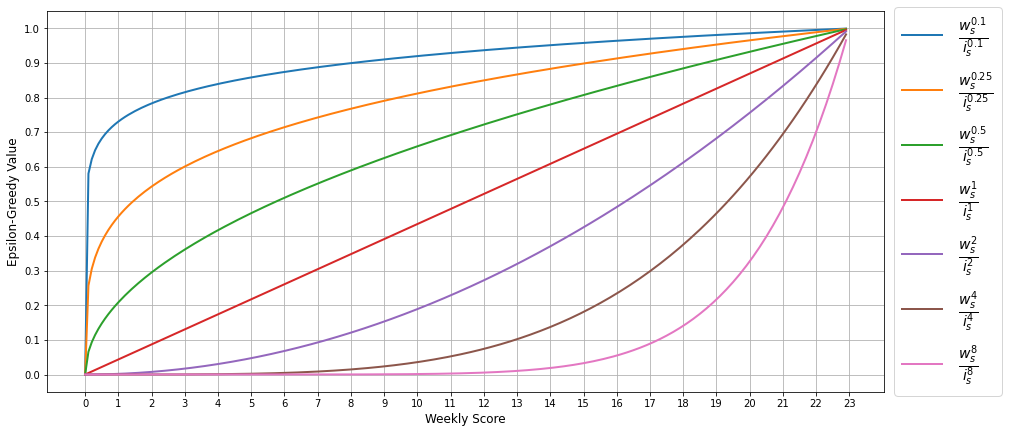

In [12]:
returnGraph(["base"], c_range, _, "images/methodology/base-functions.png", False)

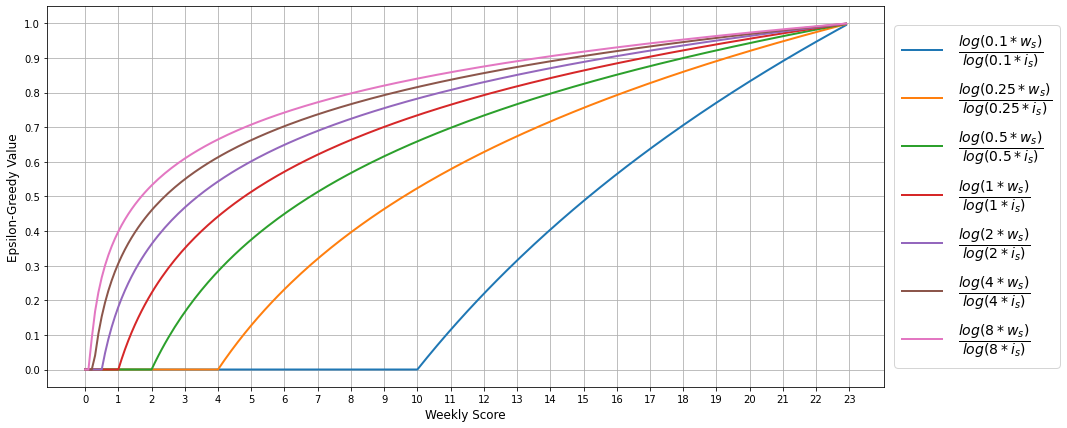

In [13]:
returnGraph(["log"], c_range, _, "images/methodology/log-functions.png", False)

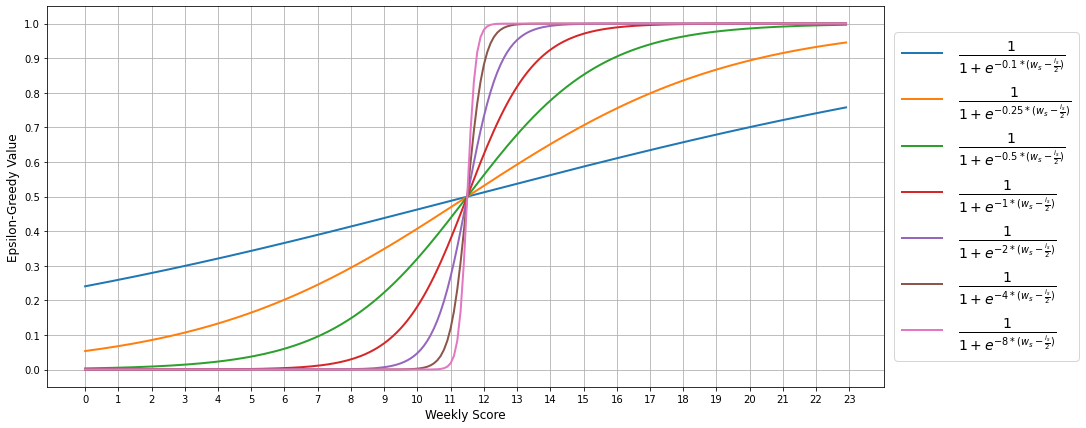

In [14]:
returnGraph(["sigmoid"], c_range, _, "images/methodology/sigmoid-functions.png", False)

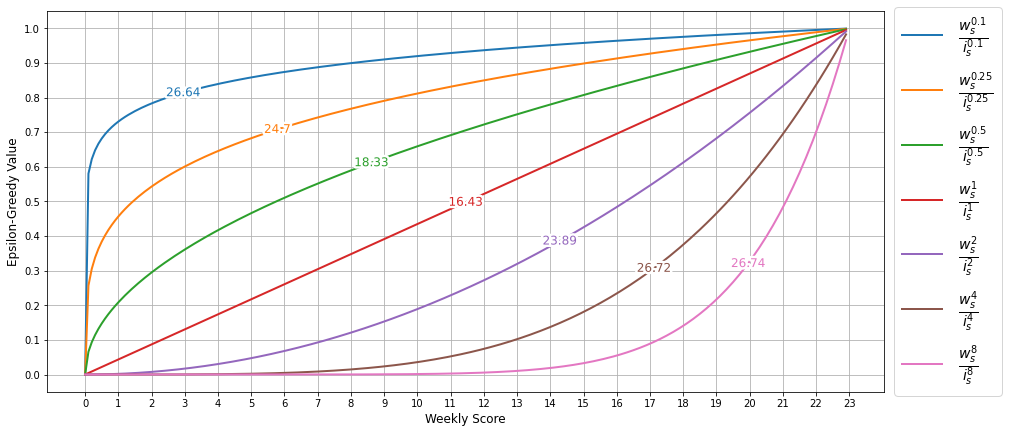

In [15]:
returnGraph(["base"], c_range, _, "images/results/base-functions_results.png", True)

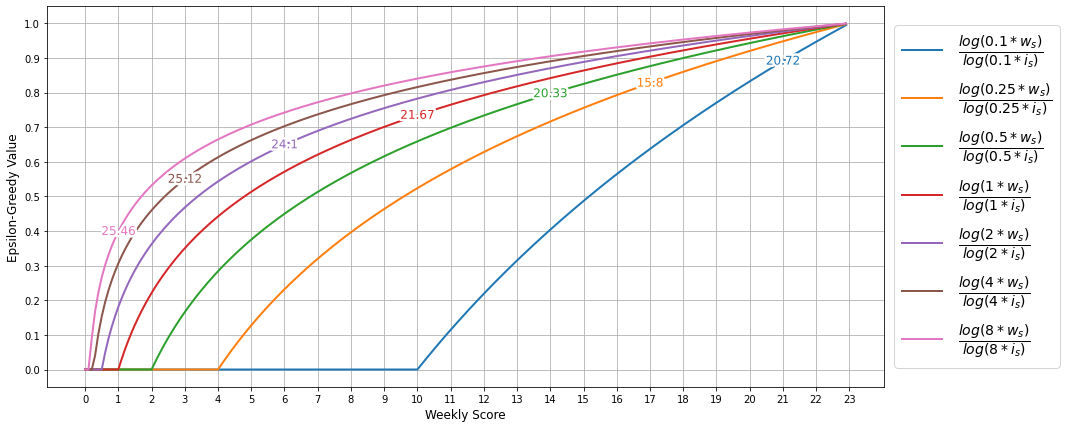

In [16]:
returnGraph(["log"], c_range, _, "images/results/log-functions_results.png", True)

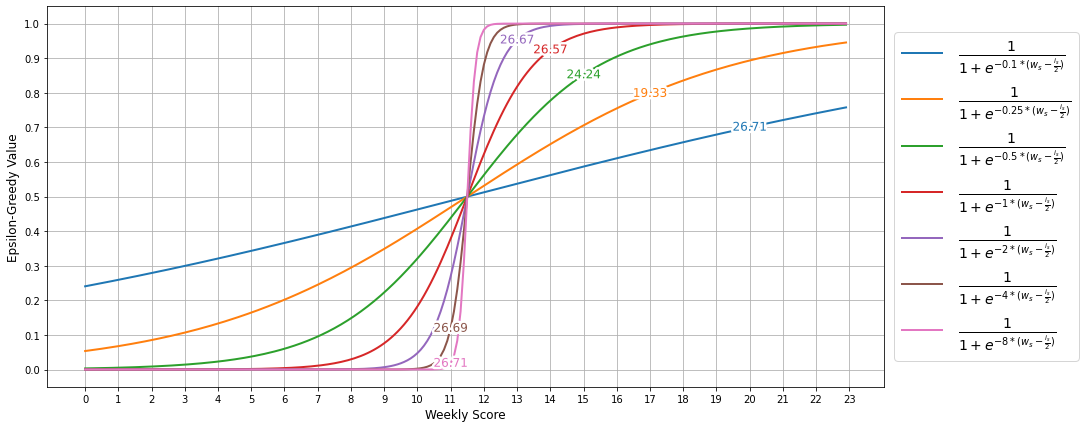

In [17]:
returnGraph(["sigmoid"], c_range, _, "images/results/sigmoid-functions_results.png", True)

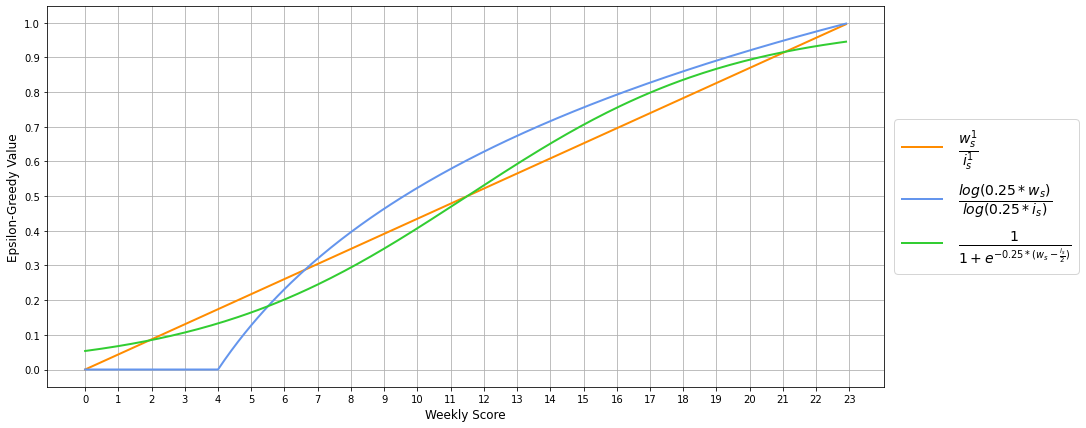

In [18]:
returnGraph(["base", "log", "sigmoid"],[1], _, "images/results/all-chosen-functions.png", False)

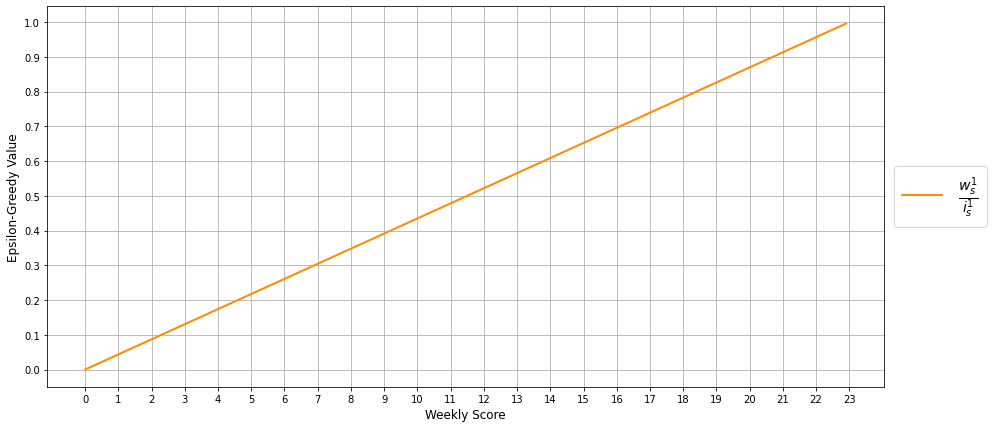

In [19]:
returnGraph(["base"],[1], _, "images/results/chosen-base.png", False)

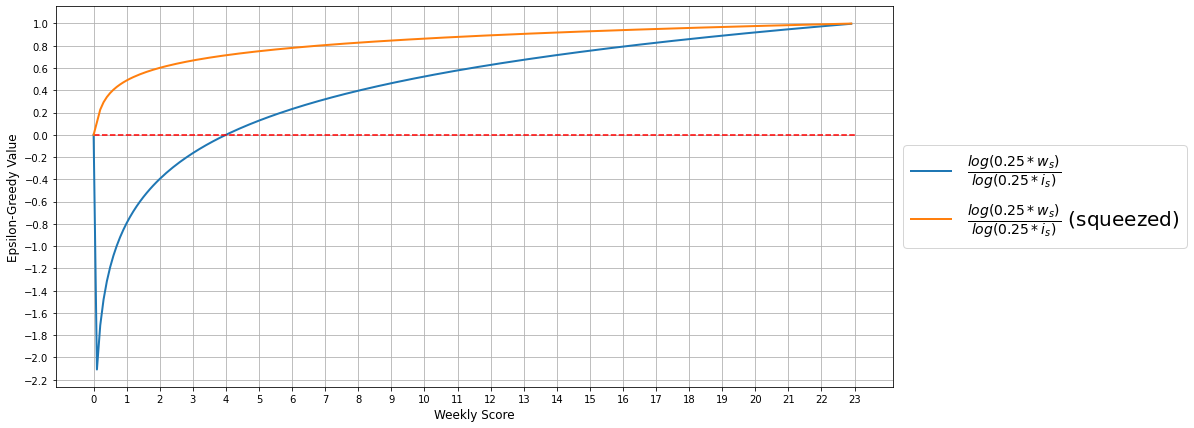

In [20]:
returnGraph(["log_full"],[1], _, "images/results/chosen-log_full.png", False)

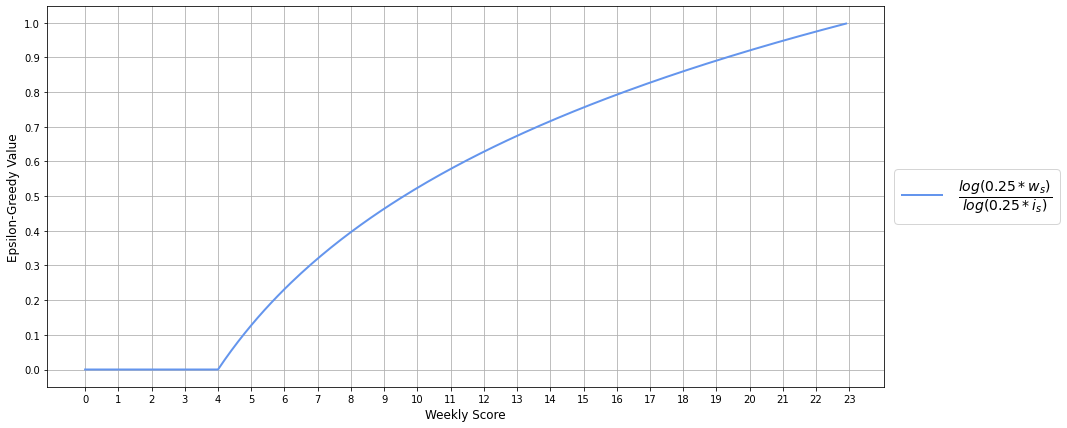

In [21]:
returnGraph(["log"],[1], _, "images/results/chosen-log.png", False)

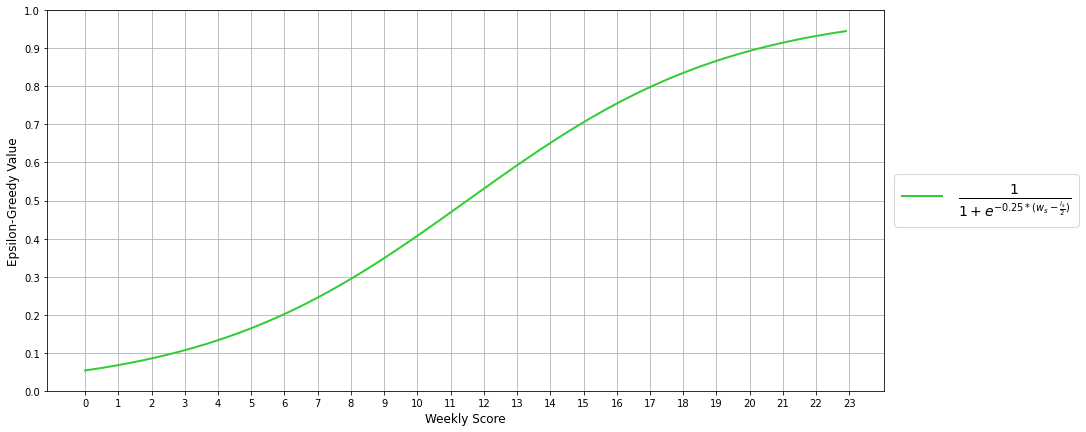

In [22]:
returnGraph(["sigmoid"],[1], _, "images/results/chosen-sigmoid.png", False)

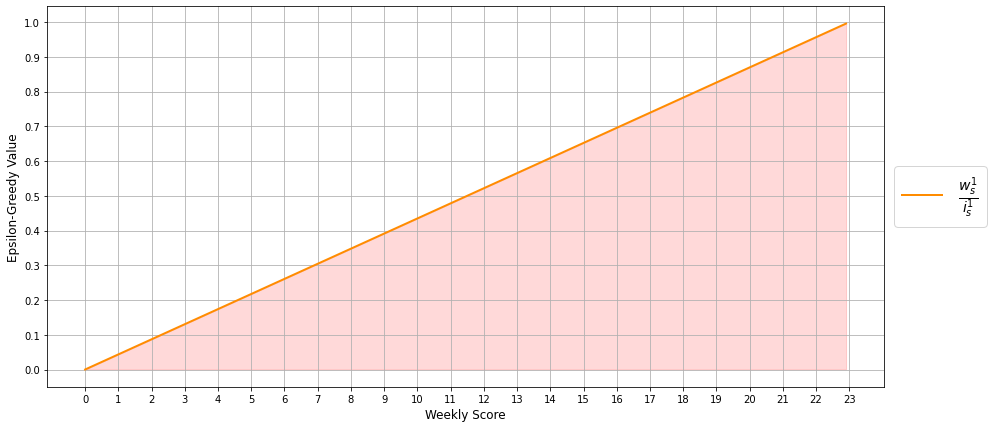

In [23]:
returnGraph(["base"], [1], 0, "images/results/chosen-base-auc.png", False)

In [24]:
f_base = lambda x: x / 23
print(integrate.quad(f_base, 0, 23)[0])

11.499999999999998


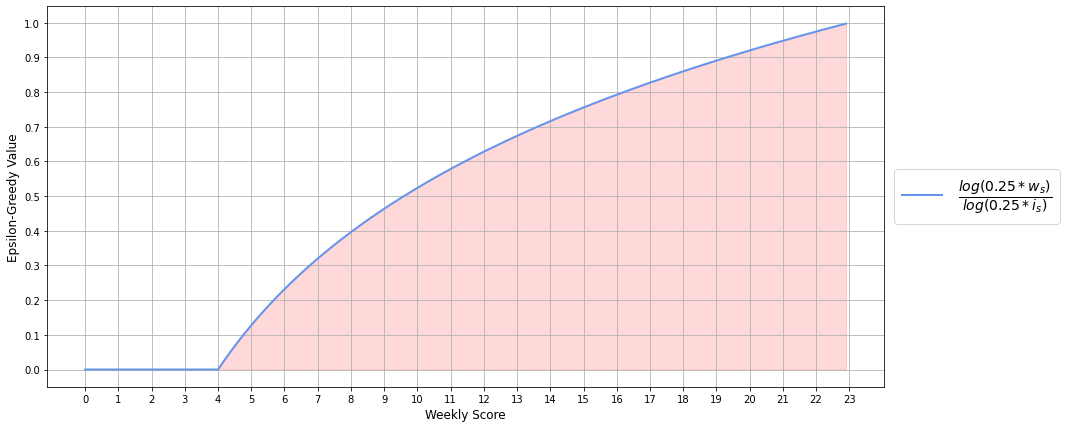

In [25]:
returnGraph(["log"], [1], 0, "images/results/chosen-log-auc.png", False)

In [26]:
f_log = lambda x: math.log(log_range[0]*x) / math.log(log_range[0]*23)
print(integrate.quad(f_log, 5, 23)[0])

12.071736026038309


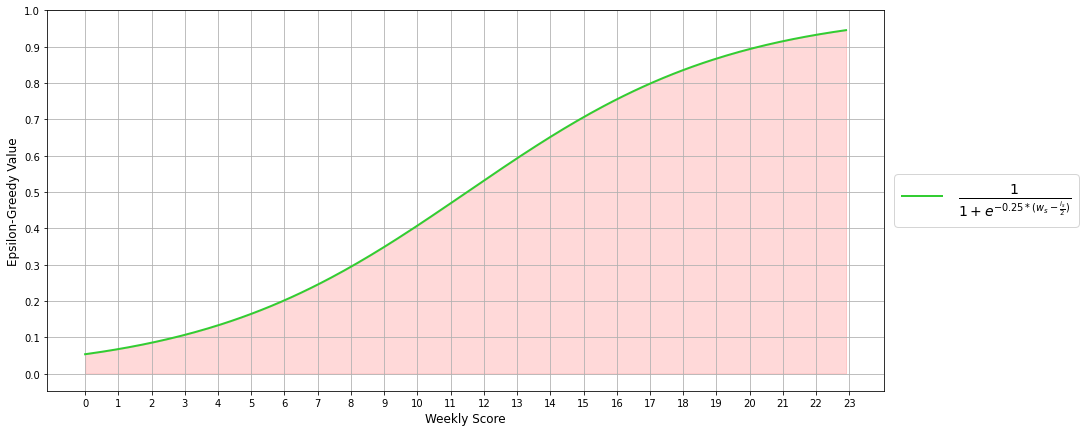

In [27]:
returnGraph(["sigmoid"],[1], 0, "images/results/chosen-sig-auc.png", False)

In [29]:
f_sig = lambda x: 1 / (1 + (math.e ** (-sigmoid_range[0] * (x - float(23/2)))))
print(integrate.quad(f_sig, 0, 23)[0])

11.5


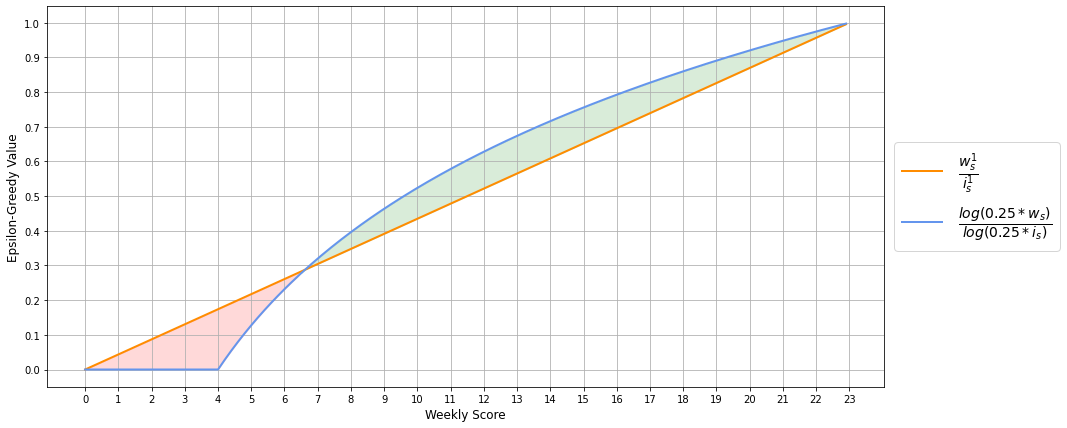

In [30]:
returnGraph(["base", "log"], [1],1, "images/results/base-log-diff.png", False)

In [31]:
base_log_area_avg = ((integrate.quad(f_base, 0, 23)[0]) + (integrate.quad(f_log, 5, 23)[0]) ) / 2

red_diff = integrate.quad(f_base, 0, 6.5)[0] - integrate.quad(f_log, 4, 6.5)[0]
green_diff = integrate.quad(f_log, 6.5, 23)[0] - integrate.quad(f_base, 6.5, 23)[0]

total_diff = red_diff + green_diff
symm_diff = abs(red_diff - green_diff)

print(red_diff)
print(green_diff)
print()

print((red_diff / base_log_area_avg) * 100)
print((green_diff / base_log_area_avg) * 100)
print()

print(total_diff)
print(symm_diff)
print()

print((total_diff / base_log_area_avg) * 100)
print((symm_diff / base_log_area_avg) * 100)

# the base, on average, is encouraging more exploitation by 8% for agents who score 
# between 0-9 (lower performing) during that week

# log,on average, is encouraging more exploitation by 5.4% for agents who score between 9-23 
# (higher performing) during that week 

0.5435635244099246
1.1814542304025526

4.611993989831568
10.024329384118927

1.7250177548124772
0.637890705992628

14.636323373950495
5.412335394287359


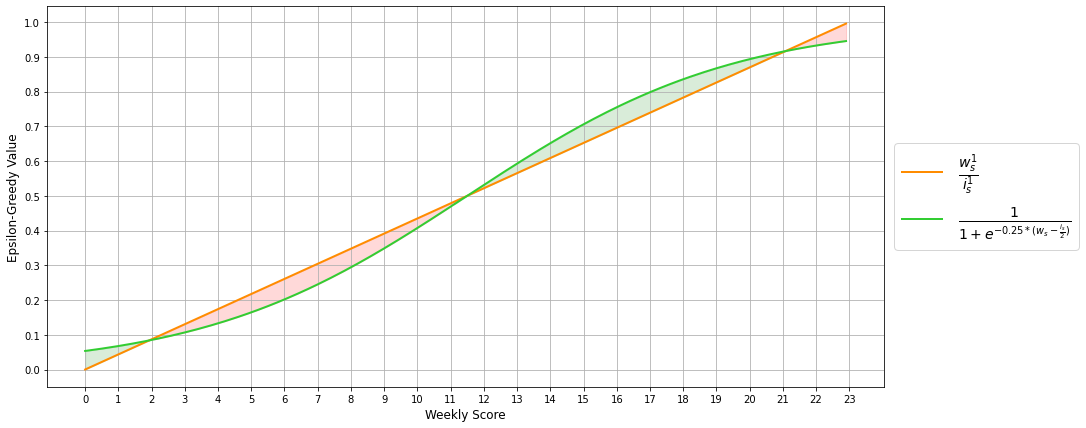

In [32]:
returnGraph(["base", "sigmoid"],[1], 1, "images/results/base-sig-diff.png", False)

In [33]:
base_sig_area_avg = ((integrate.quad(f_base, 0, 23)[0]) + (integrate.quad(f_sig, 0, 23)[0]) ) / 2

green_diff_1 = integrate.quad(f_sig, 0, 2)[0] - integrate.quad(f_base, 0, 2)[0]
red_diff_1 = integrate.quad(f_base, 2, 11.5)[0] - integrate.quad(f_sig, 2, 11.5)[0]
green_diff_2 = integrate.quad(f_sig, 11.5, 21)[0] - integrate.quad(f_base, 11.5, 21)[0]
red_diff_2 = integrate.quad(f_base, 21, 23)[0] - integrate.quad(f_sig, 21, 23)[0]

total_diff = red_diff_1 + green_diff_1 + red_diff_2 + green_diff_2 
symm_diff = abs((red_diff_1 + red_diff_2) - (green_diff_1 + green_diff_2))

red_diff = red_diff_1 + red_diff_2
green_diff = green_diff_1 + green_diff_2

print(red_diff)
print(green_diff)
print()

print((red_diff / base_sig_area_avg) * 100)
print((green_diff / base_sig_area_avg) * 100)
print()

print(total_diff)
print(symm_diff)
print()

print((total_diff / base_sig_area_avg) * 100)
print(round(((symm_diff / base_sig_area_avg) * 100),2))


0.42048524144915445
0.42048524144915517

3.656393403905691
3.6563934039056973

0.8409704828983096
7.216449660063518e-16

7.312786807811388
0.0


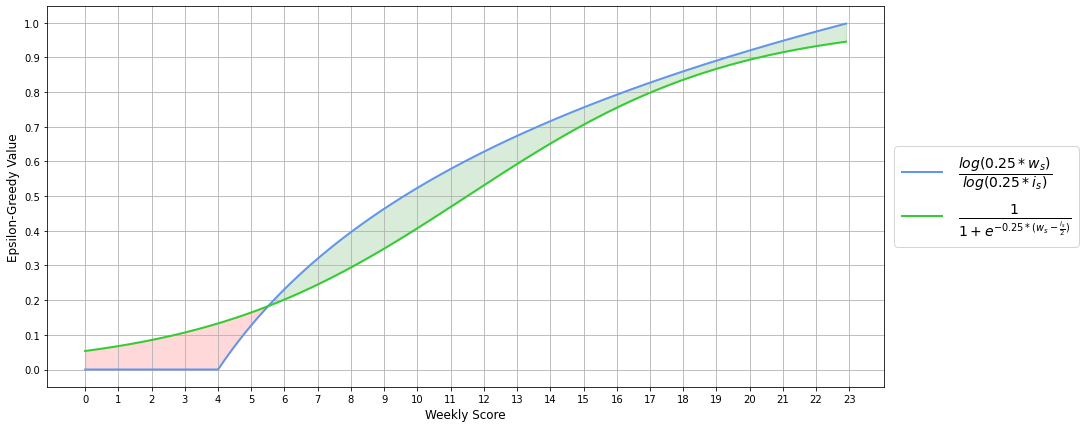

In [4]:
returnGraph(["log", "sigmoid"], [1], 1, "images/results/log-sig-diff.png", False)

In [35]:
log_sig_area_avg = ((integrate.quad(f_log, 5, 23)[0]) + (integrate.quad(f_sig, 0, 23)[0]) ) / 2

green_diff_1 = integrate.quad(f_sig, 0, 5.5)[0] - integrate.quad(f_log, 4, 5.5)[0]
red_diff_1 = integrate.quad(f_log, 5.5, 17)[0] - integrate.quad(f_sig, 5.5, 17)[0]
red_diff_2 = integrate.quad(f_log, 17, 23)[0] - integrate.quad(f_sig, 17, 23)[0]

total_diff = red_diff_1 + green_diff_1 + red_diff_2 
symm_diff = abs((red_diff_1 + red_diff_2) - (green_diff_1))

red_diff = red_diff_1 + red_diff_2

print(green_diff_1)
print(red_diff)
print()

print((green_diff_1 / log_sig_area_avg) * 100)
print((red_diff / log_sig_area_avg) * 100)
print()

print(total_diff)
print(symm_diff)
print()

print((total_diff / log_sig_area_avg) * 100)
print((symm_diff / log_sig_area_avg) * 100)


0.4423469301562908
1.080237636148916

3.7531977251709945
9.165533119458331

1.5225845663052069
0.6378907059926253

12.918730844629325
5.412335394287336


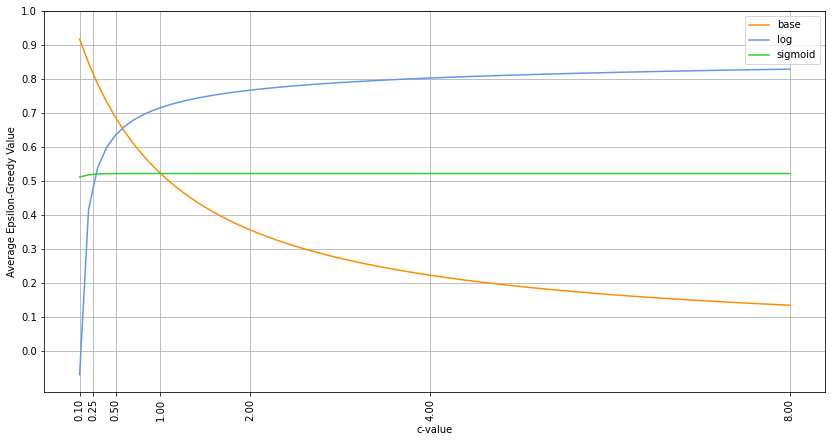

In [36]:
returnAvgGraph(["base", "log", "sigmoid"])